In [1]:
import pandas as pd

# Load your dataset as a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_excel(r"D:\Harsh\Madhura Ma'am\Cleaning\Cleaned_all_yrs.xlsx")
data

,Latitude,Longitude,Tur (NTU),Ph,EC,TDS (mg-L),Alkalinity (mg-L),Chloride (mg-L),Fluoride (mg-L),Nitrate (mg-L),Sulphate (mg-L),Total Hardness (mg-L),Iron (mg-L),Remark,Monsoon
0,18.136968,74.462032,35.30,7.78,456.923077,297.0,20.0,148.46,0.000,1.890,5.528,117.6,0.300,0,1
1,18.136968,74.462032,5.96,7.59,375.384615,244.0,20.0,39.59,0.237,1.529,3.864,151.2,0.290,0,1
2,18.136968,74.462032,33.90,8.02,553.846154,360.0,20.0,178.12,0.000,1.841,6.013,117.6,0.415,0,1
3,18.136968,74.462032,22.70,7.78,969.230769,630.0,250.0,138.56,0.995,1.813,5.528,134.4,0.300,0,1
4,18.136968,74.462032,36.00,8.02,423.076923,275.0,30.0,118.77,0.058,1.833,2.986,117.6,0.300,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53054,18.520430,73.856744,0.44,8.40,241.538462,157.0,20.0,29.67,0.694,1.852,0.000,47.5,0.000,1,1
53055,18.520430,73.856744,0.58,8.44,246.153846,160.0,20.0,19.78,0.696,2.957,6.136,85.5,0.512,1,1
53056,18.520430,73.856744,0.58,8.32,1076.923077,700.0,160.0,89.01,0.000,4.696,13.812,180.5,0.241,1,1
53057,18.520430,73.856744,0.36,8.24,546.153846,355.0,20.0,49.45,0.924,1.848,0.000,104.5,0.000,1,1


In [2]:
# Calculate the standard deviation for each column
std_deviation = data.std()

# Calculate the variance for each column
variance = data.var()

# Sort the columns by variance (or standard deviation) in descending order
sorted_columns = variance.sort_values(ascending=False)

# Print the columns with the highest variance (or standard deviation) to identify important columns
top_columns = sorted_columns.head()  # You can adjust the number of top columns to display

print("Top columns with high variance (or standard deviation):")
print(top_columns)


Top columns with high variance (or standard deviation):
EC                       612983.498639
TDS (mg-L)               256277.141881
Total Hardness (mg-L)     37906.416625
Chloride (mg-L)           21205.526565
Alkalinity (mg-L)         15026.051013
dtype: float64


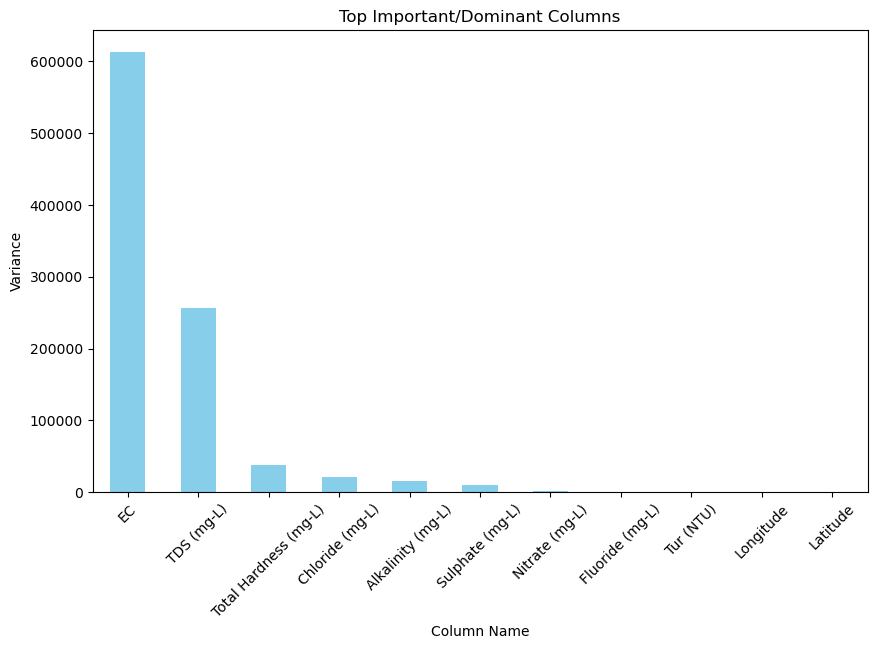

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the variance for each column
variance = data.var()

# Sort the columns by variance in descending order
sorted_columns = variance.sort_values(ascending=False)

# Choose the number of top columns to display
top_n = 11  # You can adjust the number of top columns to display

# Extract the top columns
top_columns = sorted_columns.head(top_n)

# Create a bar plot to visualize the important columns
plt.figure(figsize=(10, 6))
top_columns.plot(kind='bar', color='skyblue')
plt.title('Top Important/Dominant Columns')
plt.xlabel('Column Name')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.show()


In [4]:
data.columns

Index(['Latitude', 'Longitude', 'Tur (NTU)', 'Ph', 'EC', 'TDS (mg-L)',
       'Alkalinity (mg-L)', 'Chloride (mg-L)', 'Fluoride (mg-L)',
       'Nitrate (mg-L)', 'Sulphate (mg-L)', 'Total Hardness (mg-L)',
       'Iron (mg-L)', 'Remark', 'Monsoon'],
      dtype='object')

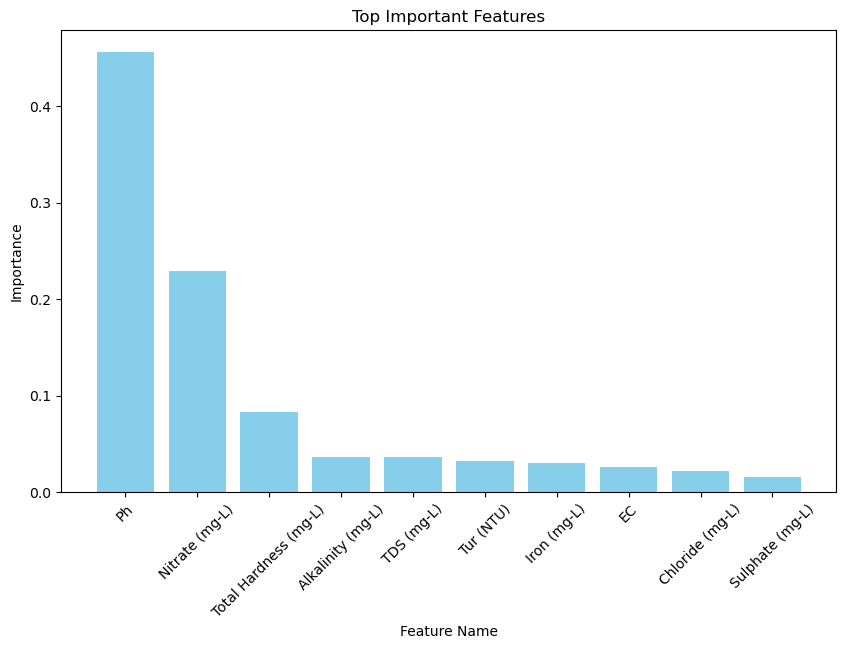

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt


# Separate the target variable (if applicable) and features
X = data.drop(columns=['Remark'])  # Replace 'target_column' with the name of your target column
y = data['Remark']  # Replace 'target_column' with the name of your target column

# Use a Random Forest classifier to calculate feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Calculate feature importances
importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 'k' features based on importance (you can adjust 'k' as needed)
top_k_features = feature_importance_df.head(10)  # Select the top 5 features as an example

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_k_features['Feature'], top_k_features['Importance'], color='skyblue')
plt.title('Top Important Features')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Use the selected top features for modeling and analysis
selected_features = top_k_features['Feature'].tolist()
X_selected = X[selected_features]

# You can now use X_selected for modeling and analysis


In [7]:
feature_importance_df

,Feature,Importance
3,Ph,0.455991
9,Nitrate (mg-L),0.229550
11,Total Hardness (mg-L),0.083046
6,Alkalinity (mg-L),0.036891
5,TDS (mg-L),0.036667
2,Tur (NTU),0.032019
12,Iron (mg-L),0.030457
4,EC,0.026528
7,Chloride (mg-L),0.021923
10,Sulphate (mg-L),0.015997


In [9]:
data=pd.read_excel(r"D:\Harsh\Madhura Ma'am\Cleaning\Cleaned_all_yrs.xlsx")

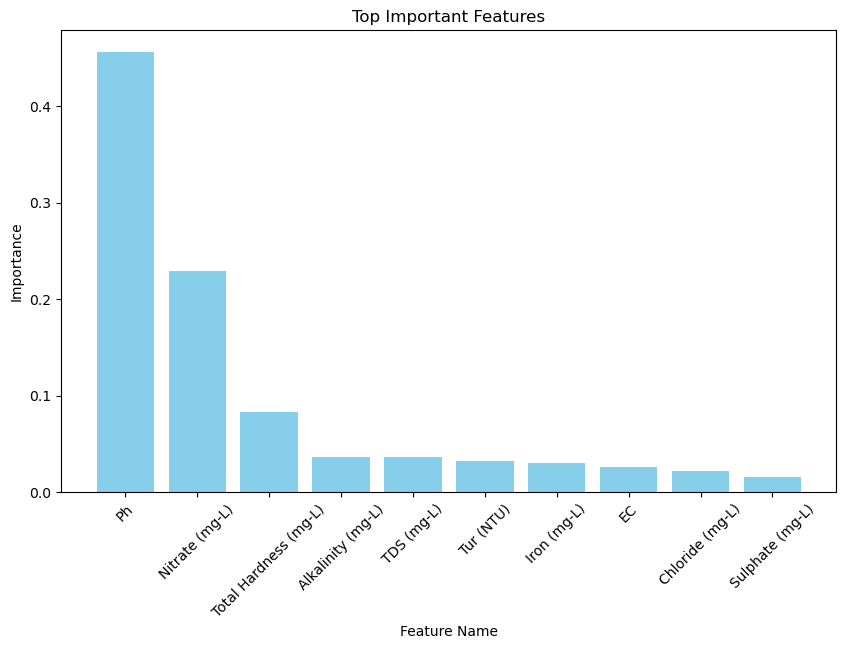

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt


# Separate the target variable (if applicable) and features
X = data.drop(columns=['Remark'])  # Replace 'target_column' with the name of your target column
y = data['Remark']  # Replace 'target_column' with the name of your target column

# Use a Random Forest classifier to calculate feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Calculate feature importances
importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 'k' features based on importance (you can adjust 'k' as needed)
top_k_features = feature_importance_df.head(10)  # Select the top 5 features as an example

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_k_features['Feature'], top_k_features['Importance'], color='skyblue')
plt.title('Top Important Features')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Use the selected top features for modeling and analysis
selected_features = top_k_features['Feature'].tolist()
X_selected = X[selected_features]

# You can now use X_selected for modeling and analysis


In [11]:
feature_importance_df

,Feature,Importance
3,Ph,0.455991
9,Nitrate (mg-L),0.229550
11,Total Hardness (mg-L),0.083046
6,Alkalinity (mg-L),0.036891
5,TDS (mg-L),0.036667
2,Tur (NTU),0.032019
12,Iron (mg-L),0.030457
4,EC,0.026528
7,Chloride (mg-L),0.021923
10,Sulphate (mg-L),0.015997
